# Task 3: Helper notebook for loading the data and saving the predictions

In [29]:
import sys
import pickle
import gzip
import numpy as np
import os
import imageio
from IPython.display import Video; 
import matplotlib.pyplot as plt
from PIL import Image
import cv2

sys.path.append("../")
from utils import display_datapoint, load_zipped_pickle, save_zipped_pickle

plt.rcParams['figure.figsize'] = [20, 20]

## Checking

In [38]:
pred1 = load_zipped_pickle("../results/128_AE-all-unet++/pred_test.pkl")
pred2 = load_zipped_pickle("../results/128_A-ED-smp_unet_jacc/pred_test.pkl")

In [62]:
pred1

[{'name': 'E9AHVWGBUF',
  'prediction': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False,

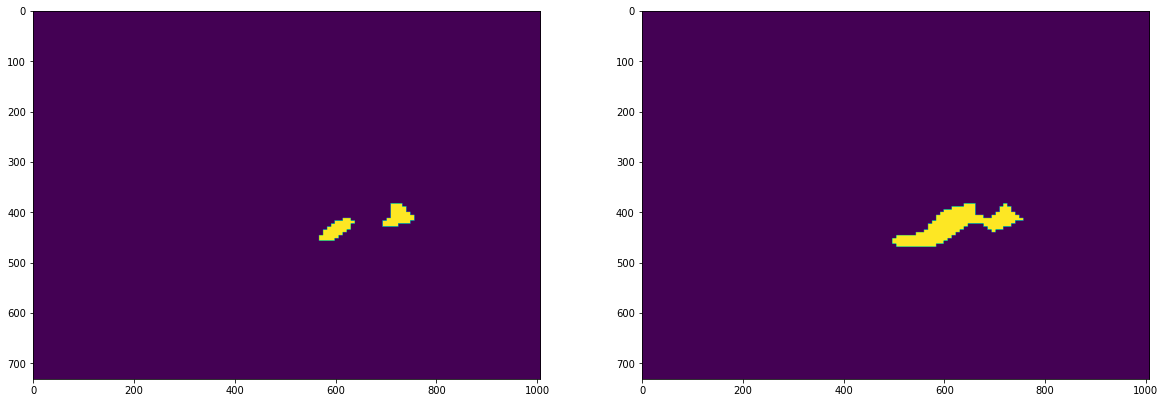

In [102]:
i = 15
frame = 60
plt.subplot(1,2,1)
plt.imshow(pred1[i]['prediction'][:,:, frame])
plt.subplot(1,2,2)
plt.imshow(pred2[i]['prediction'][:,:, frame])
plt.show()

In [87]:
pred = load_zipped_pickle("../results/128_AE_added_win5-all_1-unet++_c5-4/pred_test.pkl")

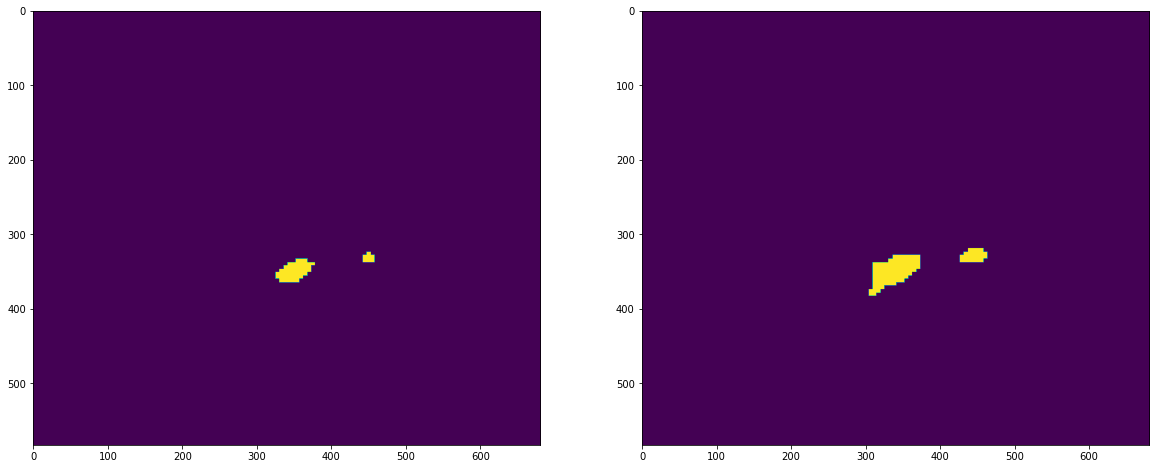

In [97]:
i = 10
frame = 15
plt.subplot(1,2,1)
plt.imshow(pred[i]['prediction'][:,:, frame])
plt.subplot(1,2,2)
plt.imshow(pred2[i]['prediction'][:,:, frame])
plt.show()

In [103]:
pred = load_zipped_pickle("../results/combined/pred_test.pkl")

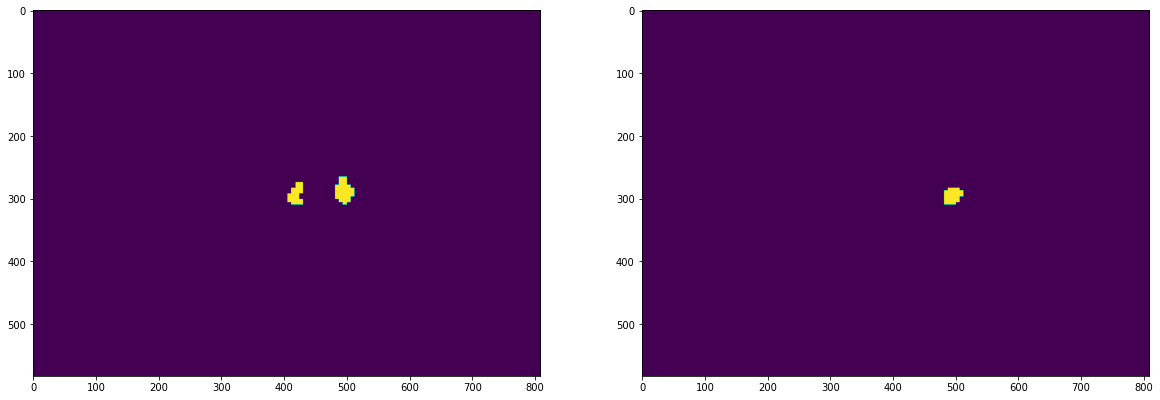

In [116]:
i = 5
frame = 25
plt.subplot(1,2,1)
plt.imshow(pred[i]['prediction'][:,:, frame])
plt.subplot(1,2,2)
plt.imshow(pred2[i]['prediction'][:,:, frame])
plt.show()

### Load data, make predictions and save prediction in correct format

In [15]:
# load data
train_data = load_zipped_pickle("../data/train.pkl")
test_data = load_zipped_pickle("../data/test.pkl")
# samples = load_zipped_pickle("data/sample.pkl")

In [18]:
for i in range(len(train_data)):
    train_data[i]['video'] = np.moveaxis(train_data[i]['video'], 2, 0)
    train_data[i]['label'] = np.moveaxis(train_data[i]['label'], 2, 0)

In [16]:
train_data[0].keys()

dict_keys(['name', 'video', 'box', 'label', 'frames', 'dataset'])

(94, 583, 810)
expert
(583, 810)
[24, 30, 66]


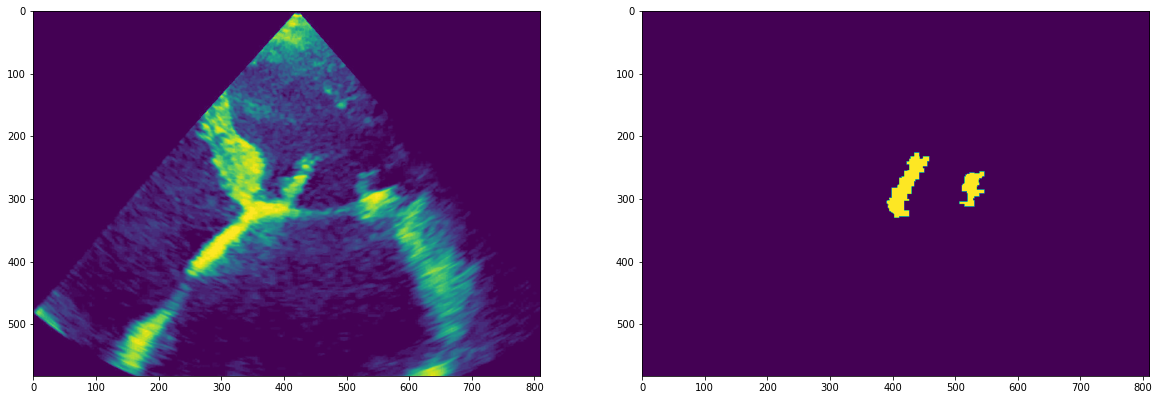

In [28]:
i = 50
print(train_data[i]['video'].shape)
print(train_data[i]['dataset'])
print(train_data[i]['video'][1,:,:].shape)
print(train_data[i]['frames'])
plt.subplot(1,2,1)
plt.imshow(train_data[i]['video'][30,:,:])
plt.subplot(1,2,2)
plt.imshow(train_data[i]['label'][30,:,:])
plt.show()

In [9]:
train_data[0]['frames']

[15, 59, 143]

In [15]:
train_data[0]['box'].shape

(112, 112)

In [8]:
train_data[50]['label'].shape

(94, 583, 810)

In [1]:
plt.rcParams["figure.figsize"] = (20,10)
SAMPLE_IDX = 40
display_datapoint(train_data[SAMPLE_IDX])
Video('test.mp4', width=500, height=500)

NameError: name 'plt' is not defined

In [ ]:
# make prediction for test
predictions = []
for d in test_data:
    prediction = np.array(np.zeros_like(d['video']), dtype=np.bool)
    height = prediction.shape[0]
    width = prediction.shape[1]
    prediction[int(height/2)-50:int(height/2+50), int(width/2)-50:int(width/2+50)] = True
    
    # DATA Strucure
    predictions.append({
        'name': d['name'],
        'prediction': prediction
        }
    )

In [ ]:
# save in correct format
save_zipped_pickle(predictions, 'my_predictions.pkl')

In [15]:
for datapoint in train_data:
    if datapoint['dataset'] == 'expert':
        print(datapoint['video'].shape)

(76, 587, 647)
(83, 585, 760)
(54, 730, 772)
(90, 583, 782)
(94, 583, 810)
(116, 579, 844)
(71, 583, 796)
(85, 584, 674)
(70, 731, 765)
(79, 583, 628)
(75, 584, 815)
(95, 731, 834)
(101, 584, 736)
(113, 583, 748)
(159, 583, 784)
(63, 583, 707)
(84, 583, 863)
(126, 583, 743)
(65, 586, 600)


## Histogram

(94, 583, 810)
expert


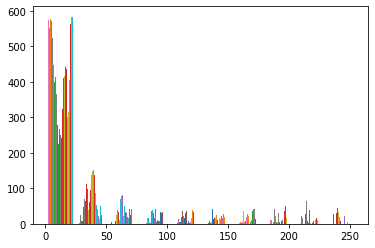

In [26]:
i = 50
print(train_data[i]['video'].shape)
print(train_data[i]['dataset'])
plt.hist(train_data[i]['video'][1,:,:])
plt.show()